# Tests of "reduced" or "approximated" CO5BOLD-data

- arief_st28gm06n052_ellipsoids/filled-mean-ellipsoids_st28gm06n052-032.pickle

Ellipsoids with only average data throughout

- arief_st28gm06n052_ellipsoids/filled-radialdistribution-ellipsoids_st28gm06n052-032.pickle

Ellipsoids with 1/r^2 dependant 

## My method:

- Load R3D-grid-file (csv with R, X, Y, Z coords of all R3D-cells)

- Create an empty list corresponding to e.g. dust_density.inp

- Loop through each ellipsoid's cell coordinates

- Compare with R3D-coordinates

- Save densities at appropiate positions in the dust_density.inp-list





In [ ]:
#I have now uploaded two pickle files on the phy-exwings server, located in: 
# /home/ariah/dat/caucus (sidenote: caucus stands for ChAracterising dUst CloUdS hahaha):

#    filled-mean-ellipsoids_st28gm06n052-032.pickle – ellipsoids filled in with 
#    mean values (i.e. uniform distribution)
#    filled-radialdistribution-ellipsoids_st28gm06n052-032.pickle – ellipsoids 
#    filled in with an inverse radial distribution (e.g. gas density higher 
#    further away from the star)

 
# These are for the snapshot 032 of the model st28gm06n052. I restructured the data 
# format following your suggestion yesterday, about separating each ellipsoids into
# different arrays rather than having one big [679^3] domain – which saved a lot of
# space! Now the data is mostly in a list of arrays. You can load the pickle files
# as follows:

###
#
#import pickle
#
#with open('[INSERTDIRECTORY]/filled-mean-ellipsoids_lists.pickle', 'rb') as handle:
#    b = pickle.load(handle)
#
###

# where you would have loaded a dictionary with the keys:

#    'centre_ellipsoid' (2D array): indices of the centre of the ellipsoids [X,Y,Z]
#    'distance_centre_grid' (1D array): distance from of the centre of the ellipsoids 
#       to the star (in cm)
#    'coord_list' (list of arrays): each element in the list is an array of the 
#       relevant indices for the eliipsoids
#    'coord_d_list' (list of arrays): each element in the list is an array of the 
#       distances from the star [X,Y,Z] (in cm)
#    'filled_rho' (list of arrays): each element in the list is an array for the 
#       values of the gas density in each coordinate
#    'filled_temp' (list of arrays): each element in the list is an array for the
#       values of the temperature in each coordinate
#    'filled_quc' (list of arrays): each element in the list is an array for the
#       values of the condensation fraction in each coordinate
#    'filled_nmonomer’ (list of arrays): each element in the list is an array for 
#       the values of the number of monomers in each coordinate

 
# There are a total of 22 ellipsoids in this snapshot. If you would like the data
# above in the format of the whole [679^3] domain, I have a small function which
# can do this -- please refer to function attached. If things are confusing then
# please let me know, we can look through the data together sometime today or
# whenever you get to this! Thank you :- )

# Important
#    `filled_nmonomer’ should be the total number of monomers, per grain; per cell
#    `filled_quc’ is actually just the monomer number density (cm-3); per cell




In [2]:
# Load
import pickle
import numpy as np
import matplotlib.pyplot as plt
AUcm = 1.49598e13 # AU in cm cm


#path = '../../exwings_archivedata/co5bold_data/st28gm06n052_arief_tests/filled-mean-ellipsoids_st28gm06n052-032.pickle'
path = '../../exwings_archivedata/co5bold_data/st28gm06n052_arief_tests/filled-radialdistribution-ellipsoids_st28gm06n052-032.pickle'

with open(path, 'rb') as f:
    ellipsoid_dict = pickle.load(f)

# Quick plots here
# Translate to r3d-inp-files





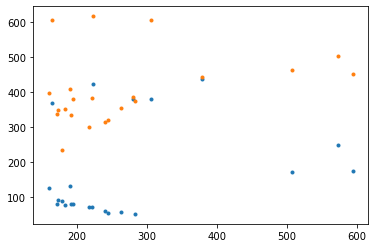

In [7]:
# Quick check of coordinates of centre of ellipsoids

print(ellipsoid_dict['centre_ellipsoid'])

# X and Y
plt.plot(
    ellipsoid_dict['centre_ellipsoid'][:,0],
    ellipsoid_dict['centre_ellipsoid'][:,1],
    '.'
)

# X and Z
plt.plot(
    ellipsoid_dict['centre_ellipsoid'][:,0],
    ellipsoid_dict['centre_ellipsoid'][:,2],
    '.'
)



In [9]:
#    'distance_centre_grid' (1D array): distance from of the centre of the ellipsoids 
#       to the star (in cm)
cloud_r_au = ellipsoid_dict['distance_centre_grid']/AUcm


array([3.77323325, 8.05164903, 8.98206196, 8.84119063, 9.33045007,
       8.23908622, 8.11251765, 8.13898043, 7.690482  , 6.92586774,
       8.82885578, 7.4305455 , 8.46003786, 8.61583901, 7.78322494,
       7.40704681, 8.17899951, 9.1437802 , 7.93717229, 8.198699  ,
       2.25307802, 6.89328836])

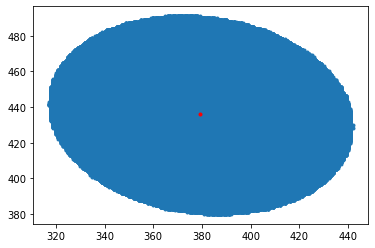

In [15]:
#    'coord_list' (list of arrays): each element in the list is an array of the 
#       relevant indices for the eliipsoids

# Plot XY-cell numbers in 
plt.plot(
    ellipsoid_dict['coord_list'][0][:,0],
    ellipsoid_dict['coord_list'][0][:,1],
    '.'
)

# And a red dot for centre cell
plt.plot(
    ellipsoid_dict['centre_ellipsoid'][0,0],
    ellipsoid_dict['centre_ellipsoid'][0,1],
    'r.'
)



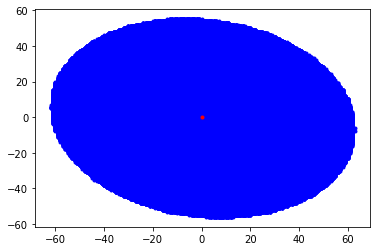

In [29]:
# Plot XY-cell numbers renomalised to zero? in 
plt.plot(
    ellipsoid_dict['coord_list'][0][:,0] - ellipsoid_dict['centre_ellipsoid'][0,0],
    ellipsoid_dict['coord_list'][0][:,1] - ellipsoid_dict['centre_ellipsoid'][0,1],
    'b.'
)

# And a red dot for centre cell
plt.plot(0,0,'r.'
)


(561184, 3)


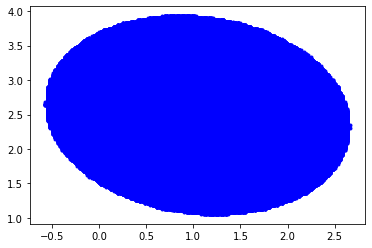

In [91]:
#    'coord_d_list' (list of arrays): each element in the list is an array of the 
#       distances from the star [X,Y,Z] (in cm)


cloud01_coords = ellipsoid_dict['coord_d_list'][0]/AUcm

# Plot cloud 0's x-y coords in AU
plt.plot(
    cloud01_coords[:,0],
    cloud01_coords[:,1],
    'b.'
)
print(cloud01_coords.shape)

(561184,)
(234647,)
(81480,)
(53787,)
(13482,)
(5918,)
(6064,)
(4172,)
(2289,)
(5646,)
(2026,)
(914,)
(1318,)
(456,)
(1121,)
(98,)
(116,)
(187,)
(282,)
(132,)
(251,)
(109,)


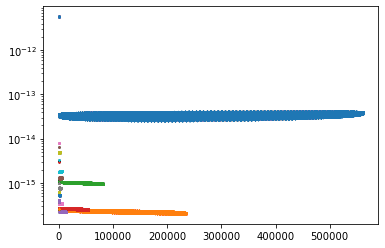

In [7]:
#    'filled_rho' (list of arrays): each element in the list is an array for the 
#       values of the gas density in each coordinate
for ncloud in range(22):
    plt.plot(ellipsoid_dict['filled_rho'][ncloud],'.',markersize=1)
    print(ellipsoid_dict['filled_rho'][ncloud].shape)
plt.yscale('log')

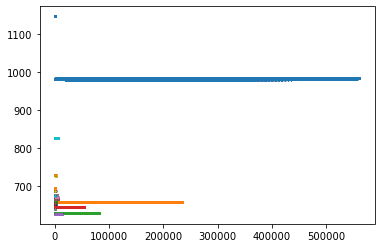

In [5]:
#    'filled_temp' (list of arrays): each element in the list is an array for the
#       values of the temperature in each coordinate
for ncloud in range(22):
    plt.plot(ellipsoid_dict['filled_temp'][ncloud],'.',markersize=1)


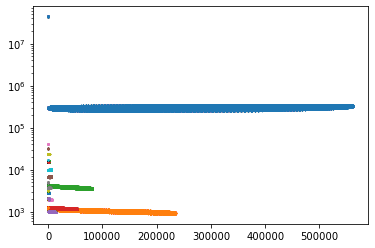

In [9]:
#    'filled_quc' (list of arrays): each element in the list is an array for the
#       values of the condensation fraction in each coordinate
for ncloud in range(22):
    plt.plot(ellipsoid_dict['filled_quc'][ncloud],'.',markersize=1)
plt.yscale('log')

In [ ]:
# Plot dust-gas-ratio here to compare numbers

import numpy as np
import matplotlib.pyplot as plt

gasdustratio = []

for ncloud in range(22):
    for data in ellipsoid_dict['filled_quc'][ncloud]/ellipsoid_dict['filled_rho'][ncloud]:
        gasdustratio.append(data)
plt.hist(gasdustratio,100);
plt.xscale('log')


In [ ]:
# Plot monomer number density here
import numpy as np
import matplotlib.pyplot as plt

monomerdensity = []
for ncloud in range(22):
    for data in ellipsoid_dict['filled_quc'][ncloud]:
        monomerdensity.append(data)

print(f'1e{np.log10(np.min(monomerdensity))}')
print(f'1e{np.log10(np.mean(monomerdensity))}')
print(f'1e{np.log10(np.max(monomerdensity))}')

#plt.plot(condensation,'.',markersize=1)
#plt.yscale('log')

plt.hist(monomerdensity,1000);
plt.xscale('log')


In [ ]:
# Plot dust density here
import numpy as np
import matplotlib.pyplot as plt

monomermass = 2.3362e-22

monomerdensity = []
for ncloud in range(22):
    for data in ellipsoid_dict['filled_quc'][ncloud]:
        monomerdensity.append(data*monomermass)

print(f'1e{np.log10(np.min(monomerdensity))}')
print(f'1e{np.log10(np.mean(monomerdensity))}')
print(f'1e{np.log10(np.max(monomerdensity))}')

#plt.plot(condensation,'.',markersize=1)
#plt.yscale('log')

plt.hist(monomerdensity,1000);
plt.xscale('log')

[0.02585142 0.05170284 0.10340568 0.10340568 0.10340568 0.10340568
 0.10340568 0.10340568 0.10340568 0.10340568 0.10340568 0.10340568
 0.10340568 0.10340568 0.10340568 0.10340568 0.10340568 0.10340568
 0.10340568 0.10340568 0.10340568 0.10340568]


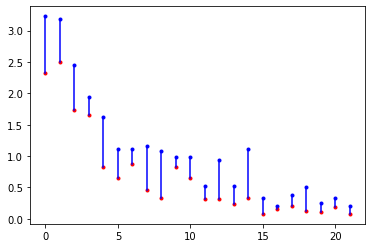

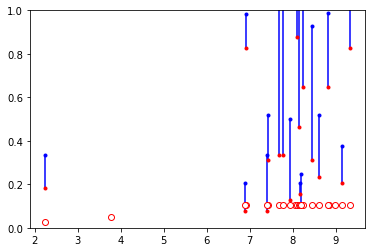

In [39]:

# Distance to ellispoids
cloud_r_au = ellipsoid_dict['distance_centre_grid']/AUcm
Ncloud = cloud_r_au.size


cloud_sizes = np.zeros(Ncloud)
cloud_sizes_minor = np.zeros(Ncloud)
cell_sizes = np.zeros(Ncloud)

for ncloud in range(Ncloud):

    # Size of ellipsoids
    cloud_sizes[ncloud] = np.array([
        (np.array(ellipsoid_dict['coord_d_list'][ncloud][:,0].max()) - \
         np.array(ellipsoid_dict['coord_d_list'][ncloud][:,0].min()))/AUcm,
        (np.array(ellipsoid_dict['coord_d_list'][ncloud][:,1].max()) - \
         np.array(ellipsoid_dict['coord_d_list'][ncloud][:,1].min()))/AUcm,
        (np.array(ellipsoid_dict['coord_d_list'][ncloud][:,2].max()) - \
         np.array(ellipsoid_dict['coord_d_list'][ncloud][:,2].min()))/AUcm
    ]).max()

    cloud_sizes_minor[ncloud] = np.array([
        (np.array(ellipsoid_dict['coord_d_list'][ncloud][:,0].max()) - \
         np.array(ellipsoid_dict['coord_d_list'][ncloud][:,0].min()))/AUcm,
        (np.array(ellipsoid_dict['coord_d_list'][ncloud][:,1].max()) - \
         np.array(ellipsoid_dict['coord_d_list'][ncloud][:,1].min()))/AUcm,
        (np.array(ellipsoid_dict['coord_d_list'][ncloud][:,2].max()) - \
         np.array(ellipsoid_dict['coord_d_list'][ncloud][:,2].min()))/AUcm
    ]).min()


    # Cell size at centre of cloud
    cell_sizes[ncloud] = 0.4136227230610557
    if cloud_r_au[ncloud] <= 13.203518763619835:
        cell_sizes[ncloud] = 0.20681136153052784
    if cloud_r_au[ncloud] <= 9.902639072714877:
        cell_sizes[ncloud] = 0.10340568076526392
    if cloud_r_au[ncloud] <= 6.601759381809917:
        cell_sizes[ncloud] = 0.05170284038263196
    if cloud_r_au[ncloud] <= 3.3008796909049587:
        cell_sizes[ncloud] = 0.02585142019131598



# Plot cloud size vs cloud "number"
plt.figure(1)
plt.plot(cloud_sizes,'b.')
plt.plot(cloud_sizes_minor,'r.')
for ncloud in range(Ncloud):
    plt.plot(
        [np.linspace(0,Ncloud-1,Ncloud)[ncloud],np.linspace(0,Ncloud-1,Ncloud)[ncloud]],
        [cloud_sizes[ncloud],cloud_sizes_minor[ncloud]],'b-'
    )


# Plot cloud size vs radial distance to centre, and grid cell size
plt.figure(2)
for ncloud in range(Ncloud):
    plt.plot(
        [cloud_r_au[ncloud],cloud_r_au[ncloud]],
        [cloud_sizes[ncloud],cloud_sizes_minor[ncloud]],'b-'
    )
plt.plot(cloud_r_au,cloud_sizes,'b.')
plt.plot(cloud_r_au,cloud_sizes_minor,'r.')
plt.plot(cloud_r_au,cell_sizes,'ro',markerfacecolor = 'w')
plt.ylim(0,1)
print(np.sort(cell_sizes))





## Test to create dust_density.inp

and other files

In [28]:
# Load an r3d-grid
import analyze_r3d_functions as a3d

griddistances = a3d.load_griddistances(
    gridpath = '../r3dresults/st28gm06n052_arief_tests/grid_distances.csv',
    amrpath = '../r3dresults/st28gm06n052_arief_tests/amr_grid.inp',
)
cellsizes = a3d.load_cellsizes(
    amrpath = '../r3dresults/st28gm06n052_arief_tests/amr_grid.inp',
    sizepath = '../r3dresults/st28gm06n052_arief_tests/grid_cellsizes.csv',
)
nleafs = a3d.load_grid_properties(
    amrpath = '../r3dresults/st28gm06n052_arief_tests/amr_grid.inp'
)[2]



In [ ]:
# Loop through coords of one of the ellipsoids and save in the r3d-grid
# In cm
import numpy as np
import pickle
import matplotlib.pyplot as plt
import analyze_r3d_functions as a3d
import os


AUcm = 1.49598e13 # AU in cm cm
monomermass = 2.3362e-22 # Forsterite mass in g



print('Load data')

# Load Ariefs pickles
path = '../../exwings_archivedata/co5bold_data/st28gm06n052_arief_tests/filled-mean-ellipsoids_st28gm06n052-032.pickle'
with open(path, 'rb') as f:
    ellipsoid_dict = pickle.load(f)


# Load an r3d-grid
r3ddistances = a3d.load_griddistances(
    gridpath = '../r3dresults/st28gm06n052_arief_tests/grid_distances.csv',
    amrpath = '../r3dresults/st28gm06n052_arief_tests/amr_grid.inp',
)
r3dcellsizes = a3d.load_cellsizes(
    amrpath = '../r3dresults/st28gm06n052_arief_tests/amr_grid.inp',
    sizepath = '../r3dresults/st28gm06n052_arief_tests/grid_cellsizes.csv',
)
nleafs = a3d.load_grid_properties(
    amrpath = '../r3dresults/st28gm06n052_arief_tests/amr_grid.inp'
)[2]


In [1]:
import analyze_ellipsoidapprox as ael

# filled-mean-ellipsoids_st28gm06n052-032.pickle
# filled-radialdistribution-ellipsoids_st28gm06n052-032.pickle

ael.create_dustapproximation(
    picklepath = '../../exwings_archivedata/co5bold_data/st28gm06n052_arief_tests/filled-mean-ellipsoids_st28gm06n052-032.pickle'
)


Start time:
tor 21 dec 2023 10:33:19 CET
Loading data
  There are 22 dust clouds:
  Cloud 1 has 561184 c5d-cells.
      and 359485 r3d-cells.
  Cloud 2 has 234647 c5d-cells.
      and 18295 r3d-cells.
  Cloud 3 has 81480 c5d-cells.
      and 7595 r3d-cells.
  Cloud 4 has 53787 c5d-cells.
      and 5460 r3d-cells.
  Cloud 5 has 13482 c5d-cells.
      and 1603 r3d-cells.
  Cloud 6 has 5918 c5d-cells.
      and 480 r3d-cells.
  Cloud 7 has 6064 c5d-cells.
      and 891 r3d-cells.
  Cloud 8 has 4172 c5d-cells.
      and 420 r3d-cells.
  Cloud 9 has 2289 c5d-cells.
      and 176 r3d-cells.
  Cloud 10 has 5646 c5d-cells.
      and 1173 r3d-cells.
  Cloud 11 has 2026 c5d-cells.
      and 420 r3d-cells.
  Cloud 12 has 914 c5d-cells.
      and 45 r3d-cells.
  Cloud 13 has 1318 c5d-cells.
      and 108 r3d-cells.
  Cloud 14 has 456 c5d-cells.
      and 30 r3d-cells.
  Cloud 15 has 1121 c5d-cells.
      and 132 r3d-cells.
  Cloud 16 has 98 c5d-cells.
      and 9 r3d-cells.
  Cloud 17 has 116 c5d-

0.9004326654410133


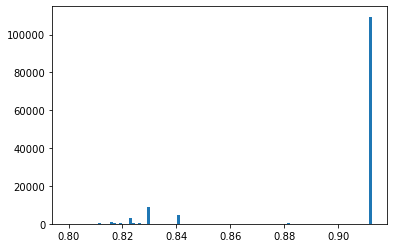

In [2]:
# Plot extracted grain sizes (before binning), in um
import numpy as np
import matplotlib.pyplot as plt

grainsizes = np.loadtxt(
    '../r3dresults/st28gm06n052_arief_tests/032_averages/grain_sizes_approx.dat'
)*1e4
grainsizes = grainsizes[np.where(grainsizes > 0)[0]]
plt.hist(grainsizes,100)
print(grainsizes.mean())


In [2]:
# Bin grain sizes
import analyze_co5bold_functions as a5d

# 032_averages
# 032_radialdist

a5d.bin_grainsizes(
    grainsizepath = '../r3dresults/st28gm06n052_arief_tests/032_averages/grain_sizes_approx.dat',
    phase = 'approx'
)



a5d.bin_grainsizes():
    grain_sizes_binned_approx.dat
DONE



In [1]:
# Bin all inp-data and write optool-script and dustopac-file
import analyze_ellipsoidapprox as ael

#path = '../r3dresults/st28gm06n052_arief_tests/032_radialdist/'
path = '../r3dresults/st28gm06n052_arief_tests/032_averages/'

ael.bin_inpdata(
    grainsizes_path = f'{path}grain_sizes_binned_approx.dat',
    density_path = f'{path}dust_density_approx.inp',
    temperature_path = f'{path}dust_temperature_approx.dat',
    wavelength_path = f'{path}wavelength_micron.inp'
)


Start binning of density and temperature
    Grain sizes are (um):
[0.8053, 0.8166, 0.8279, 0.8392, 0.8843000000000001, 0.9069]
yes
create_optoolscript:
    ../optool_script.sh
    ../dustopac_{specie}_{phase}.inp
DONE

  writing ...
  ../dust_density_approx_6bins.inp
  ../dust_temperature_approx_6bins.dat
DONE!


Extracting species mg2sio4_7.386e-01
Extracting species mg2sio4_7.659e-01
Extracting species mg2sio4_7.933e-01
Extracting species mg2sio4_8.206e-01
Extracting species mg2sio4_8.480e-01
Extracting species mg2sio4_9.300e-01
Extracting species mg2sio4_9.573e-01
Extracting species mg2sio4_9.847e-01


(<Figure size 432x936 with 4 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f653a30d3d0>,
       dtype=object))

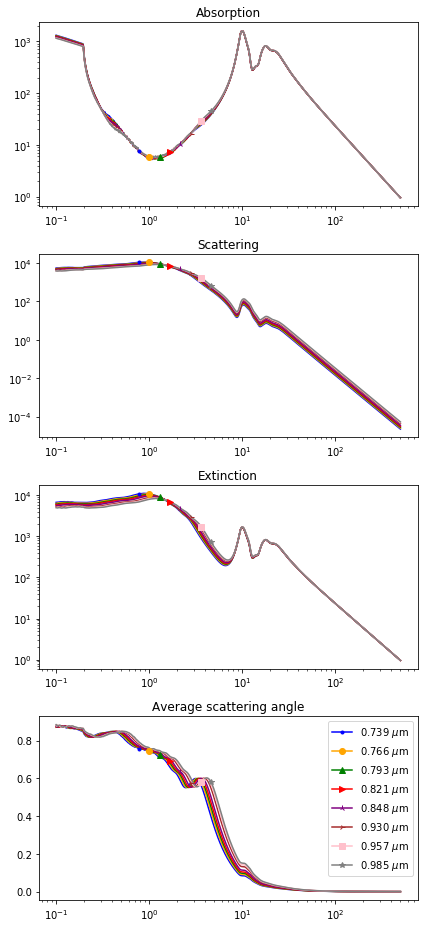

In [5]:
# Test plot the binned grain size optical data
import analyze_r3d_functions as a3d
a3d.plot_allkappa(path = '../r3dresults/st28gm06n052_arief_tests/032_averages/')

In [4]:
import numpy as np

path = '../r3dresults/st28gm06n052_arief_tests/032_radialdist/'
grainsizes_path = f'{path}grain_sizes_binned_approx.dat'
density_path = f'{path}dust_density_approx.inp'
temperature_path = f'{path}dust_temperature_approx.dat'
wavelength_path = f'{path}wavelength_micron.inp'


# Load binned grain sizes per grid cell
grainsizes_grid = []
with open(grainsizes_path, 'r') as fgrainsizes:
    for line in fgrainsizes.readlines():
        if line[0] != '#':
            grainsizes_grid.append(float(line))
grainsizes_grid = np.array(grainsizes_grid)

# Extract unique sizes
grainsizes = np.unique(grainsizes_grid)
# Only save the grainsizes that aren't zero
grainsizes = grainsizes[np.where(grainsizes > 0)[0]]
Nbins = len(grainsizes)
# Save separate list with grainsizes in um
grainsizes_list_um = grainsizes*1e4


print(grainsizes[-1])
print(grainsizes_list_um[-1]*1e-4)
print(np.unique(grainsizes_grid)[-1])
print(np.unique(grainsizes_grid)[-1] == grainsizes[-1])


9.847e-05
9.847000000000001e-05
9.847e-05
True
